# [IAPR 2020:][iapr2020] Lab 1 ‒  Image segmentation

**Author:** first name and last name  
**Due date:** 26.03.2020

[iapr2018]: https://github.com/LTS5/iapr-2020

## Extract relevant data
We first need to extract the `lab-01-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [1]:
import tarfile
import os

%matplotlib inline

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-01-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

## Part 1: Brain segmentation

Your goal: compute the size of the brain (in pixels) in a 2D image of a human head taken by Magnetic Resonance Imaging (MRI).
* Try as many methods as you can, the more the better.
* At least region growing and contour detection.

### 1.1 Brain image visualization

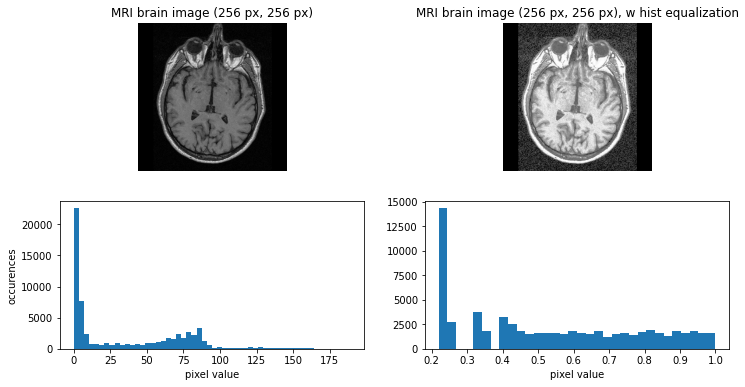

In [2]:
import skimage.io
import matplotlib.pyplot as plt
from skimage import exposure
import numpy as np

# Load image
data_path = os.path.join(data_base_path, data_folder)
brain_im = skimage.io.imread(os.path.join(data_path, 'brain-slice40.tiff'))
im_h, im_w = brain_im.shape

fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2, figsize=(12, 6))
ax1.imshow(brain_im, cmap='gray')
ax2.imshow(exposure.equalize_hist(brain_im), cmap='gray')
ax1.set_title('MRI brain image ({} px, {} px)'.format(im_h, im_w))
ax2.set_title('MRI brain image ({} px, {} px), w hist equalization'.format(im_h, im_w))
ax1.axis('off')
ax2.axis('off')
ax3.hist(x=brain_im.ravel(), bins='auto')
ax3.set_xlabel("pixel value"); ax3.set_ylabel("occurences")
ax4.hist(x=exposure.equalize_hist(brain_im).ravel(), bins='auto')
ax4.set_xlabel("pixel value"); ax3.set_ylabel("occurences")
plt.show()

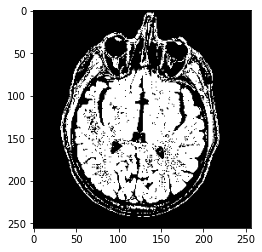

In [4]:
# Segmentation

brain_im_bin=np.where((brain_im>50) & (brain_im<90),256,0)
plt.imshow(brain_im_bin, cmap='gray')
plt.show()

### 1.2 Region growing
Add your implementation and discussion

### 1.3 Contour detection
Add your implementation and discussion

15718

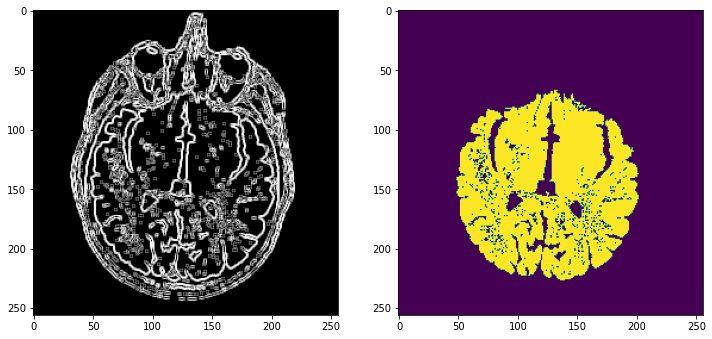

In [5]:
from scipy import ndimage as ndi
from skimage.filters import roberts, sobel, scharr, prewitt
from skimage.segmentation import watershed

#brain_edge = ndi.gaussian_laplace(brain_im_bin, sigma=0.5).astype(np.float64)
brain_edge = prewitt(brain_im_bin)

markers = np.zeros_like(brain_edge)
markers[brain_im_bin < 30] = 1
markers[brain_im_bin > 200] = 2

segmentation = watershed(brain_edge, markers)
segmentation = ndi.binary_fill_holes(segmentation - 1, structure=np.ones((10,10)))
labeled_brain, _ = ndi.label(segmentation)

#labeled_brain[(labeled_brain>150) & (labeled_brain<200)] = 200
labeled_brain[labeled_brain != 151] = 0
labeled_brain[labeled_brain == 151] = 1

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12, 12))
ax1.imshow(brain_edge, cmap='gray')
ax2.imshow(labeled_brain)

plt.show

100*np.sum(labeled_brain)/labeled_brain.size
np.sum(labeled_brain)

### 1.4 Additional method(s)
Add your implementation and discussion

## Part 2: Shape/color segmentation

You will find hereafter three pictures taken under three different illuminations, containing some shapes with different colors. We ask you to create a routine to:

1. Count the number of shapes of each color.
2. Compute the total area (in pixels) of each color.

Please note that one specific challenge is to be robust to illumination changes. Therefore some kind of intensity normalization should probably be used.

**Note:** the routine(s) that you will write for this exercise will be useful for the final project as well, so pay special attention to it.

### 2.1 Visualization

In [3]:
# Load images
im_names = ['arena-shapes-01', 'arena-shapes-02', 'arena-shapes-03']
filenames = [os.path.join(data_path, name) + '.png' for name in im_names]
ic = skimage.io.imread_collection(filenames)
images = skimage.io.concatenate_images(ic)
print('Number of images: ', images.shape[0])
print('Image size: {}, {} '.format(images.shape[1], images.shape[2]))
print('Number of color channels: ', images.shape[-1])


Number of images:  3
Image size: 480, 640 
Number of color channels:  3


In [4]:
# Plot images
fig, axes = plt.subplots(1, 3, figsize=(12, 12))
for ax, im, nm in zip(axes.ravel(), images, im_names):
    ax.imshow(im)
    ax.axis('off')
    ax.set_title(nm)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

### 2.2 Number of shapes of each color
Add your implementation and discussion

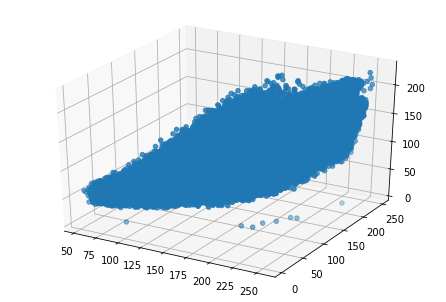

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2

#img = images[0]

img = cv2.imread("../data/lena.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

r, g, b = cv2.split(img)
r = r.flatten()
g = g.flatten()
b = b.flatten()

#plotting 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b)
plt.show()

In [36]:
vectorized = img.reshape((-1,3))
vectorized = np.float32(vectorized)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

K = 2
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)

center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))


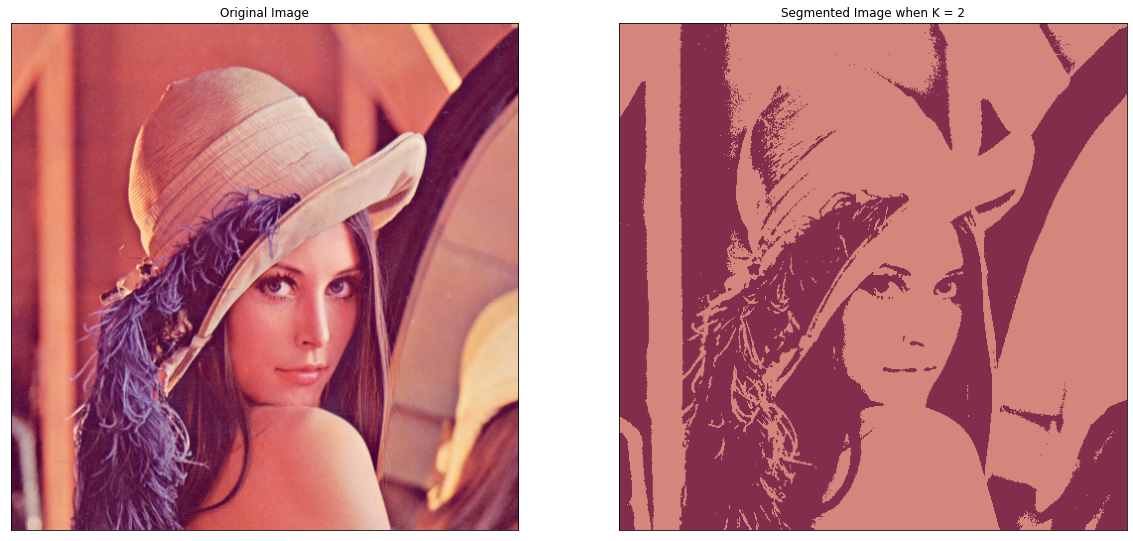

In [37]:
figure_size = 20
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

### 2.3 Total area (in pixels) of each color
Add your implementation and discussion